<a href="https://colab.research.google.com/github/anzalshaikh27/Travel-Insurance-Prediction/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters.


**Numeric Datatypes:**

-->  "Index", "Age", "AnnualIncome", "FamilyMembers", and "TravelInsurance" columns have numeric data types (int64).


**Categorical Datatypes:**

--> "Employment Type", "GraduateOrNot", "FrequentFlyer", and "EverTravelledAbroad" columns have categorical data (object)

**Target:**

--> TravelInsurance (represented as 0 or 1)

In [1]:
#Installing required packages
!pip install xgboost
!pip3 install h2o
!pip install requests
!pip install tabulate
!pip install future
!pip install fancyimpute

# for outlier preprocessing
!pip install datasist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=5421a646147f7ba4f5c9feae7c7078210978370d466ff33fc4283f7af8ddf0c5
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=ad5cd68c2739555384f081cd12d87ffb0a49ed203a5d01a438ce27f43f73c251
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=12f220d98ca6acd9bcda3c82a5c73d9e076767f81438ceecba48b9b9f2f4e2c4
  Sto

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML


In [4]:
#Initialize the H2O Cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr9mu2a16
  JVM stdout: /tmp/tmpr9mu2a16/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr9mu2a16/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_38jagh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
#Load the dataset as a H2OFrame
data = pd.read_csv('https://raw.githubusercontent.com/anzalshaikh27/Travel-Insurance-Prediction/main/TravelInsurancePrediction.csv')
data.head()


,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
# Excluding the ID column
data = data.drop('Index', axis=1)

In [7]:
#data['Employment Type'] = data['Employment Type'].str.strip()

#converting categorical values to numeric
data["GraduateOrNot"]= data["GraduateOrNot"].map({"No" :0, "Yes" : 1})
data["FrequentFlyer"]= data["FrequentFlyer"].map({"No" :0, "Yes" : 1})
data["EverTravelledAbroad"]= data["EverTravelledAbroad"].map({"No" :0, "Yes" : 1})
data["Employment Type"]= data["Employment Type"].map({"Government Sector" :0, "Private Sector/Self Employed" : 1})

#defining categorical and numerical values
cats = []
nums = []
for i in data.columns:
  if data[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

data.head()

cats =  []
nums =  ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [8]:
data.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,-0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
Employment Type,-0.115134,1.000000,-0.127133,0.349157,-0.003354,-0.011553,0.143790,0.181098,0.147847
GraduateOrNot,0.027125,-0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,-0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,-0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.147847,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


<Axes: >

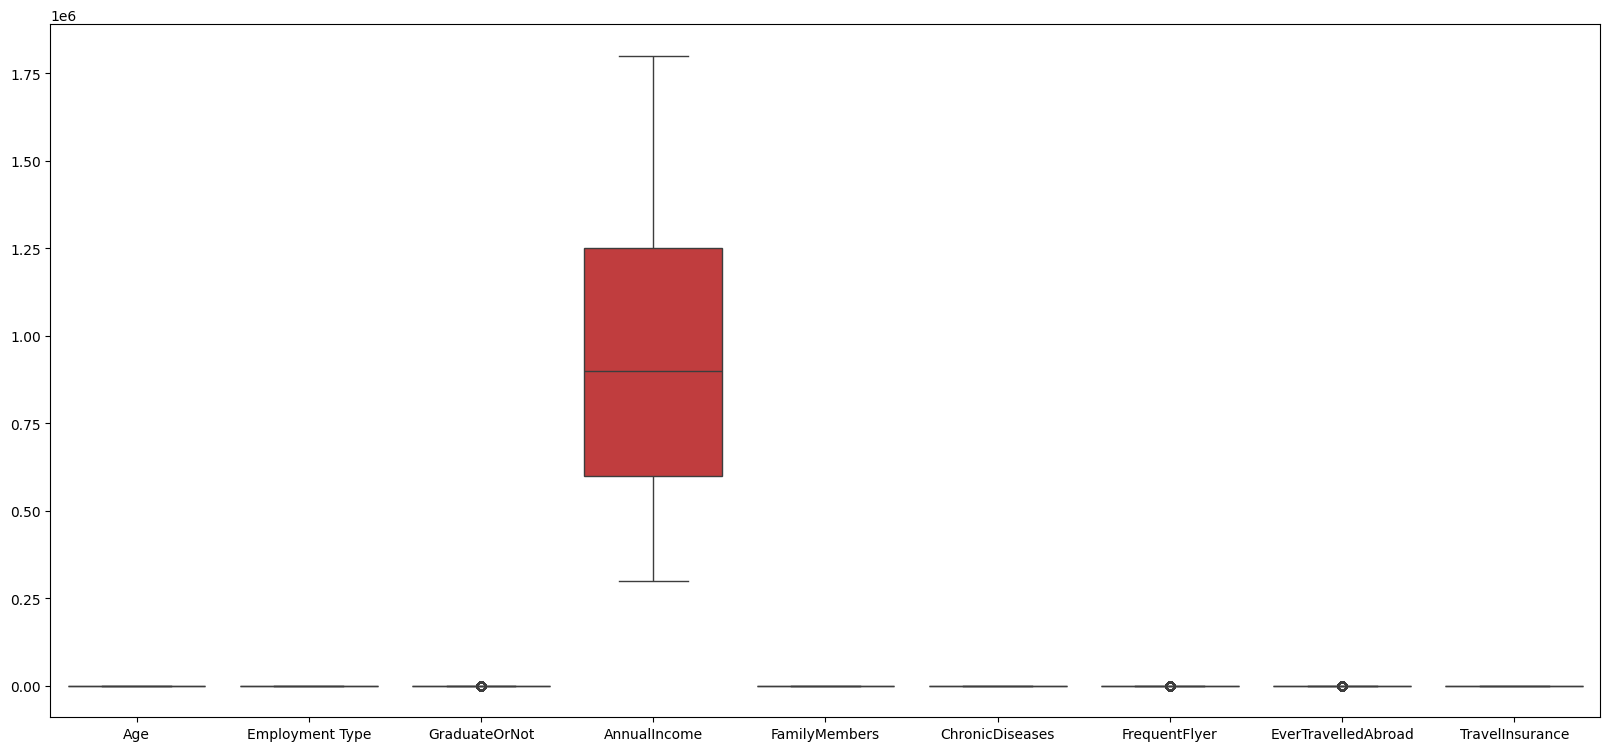

In [9]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

<Axes: >

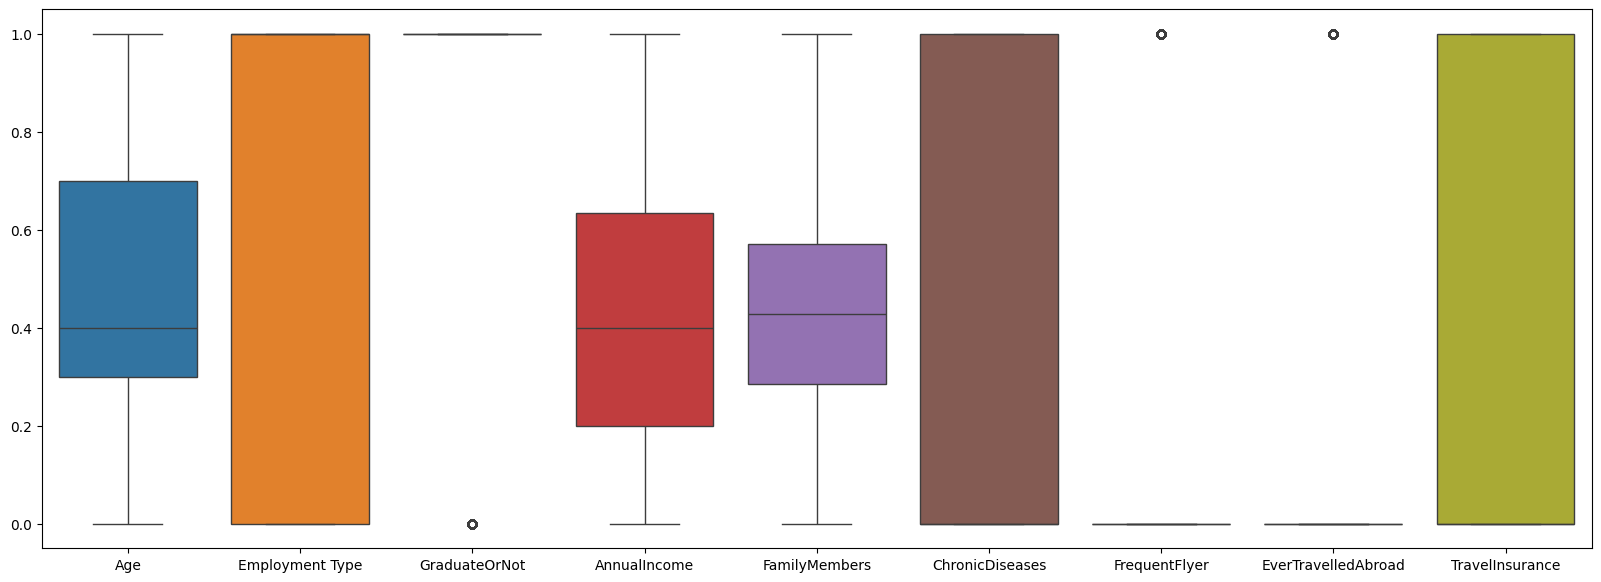

In [10]:
# Normalizing the data in the annual income, Age and FamilyMembers column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["AnnualIncome"]].values.astype(float)
x2 = data[["Age"]].values.astype(float)
x3 = data[["FamilyMembers"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
x2_scaled = min_max_scaler.fit_transform(x2)
x3_scaled = min_max_scaler.fit_transform(x3)

# Run the normalizer on the dataframe
data[["AnnualIncome"]] = pd.DataFrame(x_scaled)
data[["Age"]] = pd.DataFrame(x2_scaled)
data[["FamilyMembers"]] = pd.DataFrame(x3_scaled)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)


Class Distribution:
0    1277
1     710
Name: TravelInsurance, dtype: int64

Class Proportions:
0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64


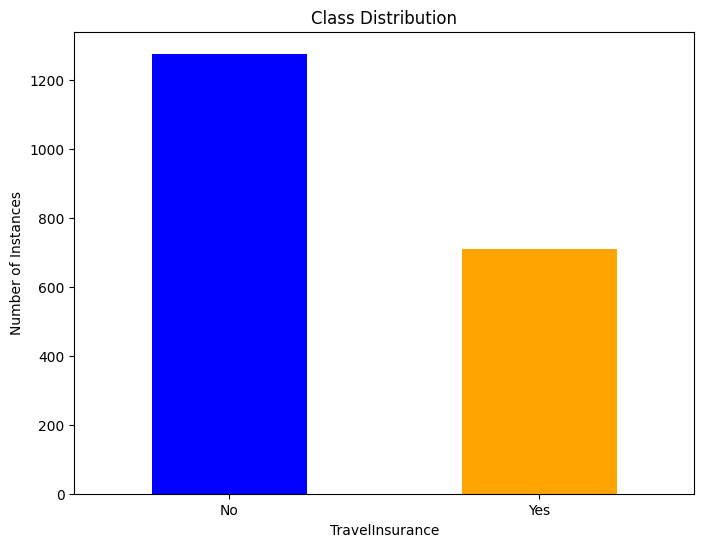

In [11]:
# Count the number of instances for each class
class_counts = data['TravelInsurance'].value_counts()

# Calculate the proportion of each class label relative to the total number of instances
total_instances = len(data)
class_proportions = class_counts / total_instances

print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('TravelInsurance')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Count the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))
data.tail()

Before SMOTE: Counter({1: 900, 0: 100})
After SMOTE: Counter({1: 900, 0: 900})


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,0.8,1,1,0.800000,0.285714,0,1,1,1
1983,0.3,1,1,0.966667,0.428571,1,0,1,0
1984,0.3,1,1,0.566667,0.571429,1,0,0,0
1985,0.9,1,1,0.466667,0.571429,0,1,1,1
1986,0.9,1,1,0.133333,0.285714,0,0,0,0


Correlation with target variable:
TravelInsurance        1.000000
EverTravelledAbroad    0.433183
AnnualIncome           0.396763
FrequentFlyer          0.232103
Employment Type        0.147847
FamilyMembers          0.079909
Age                    0.061060
GraduateOrNot          0.018934
ChronicDiseases        0.018190
Name: TravelInsurance, dtype: float64


<Axes: >

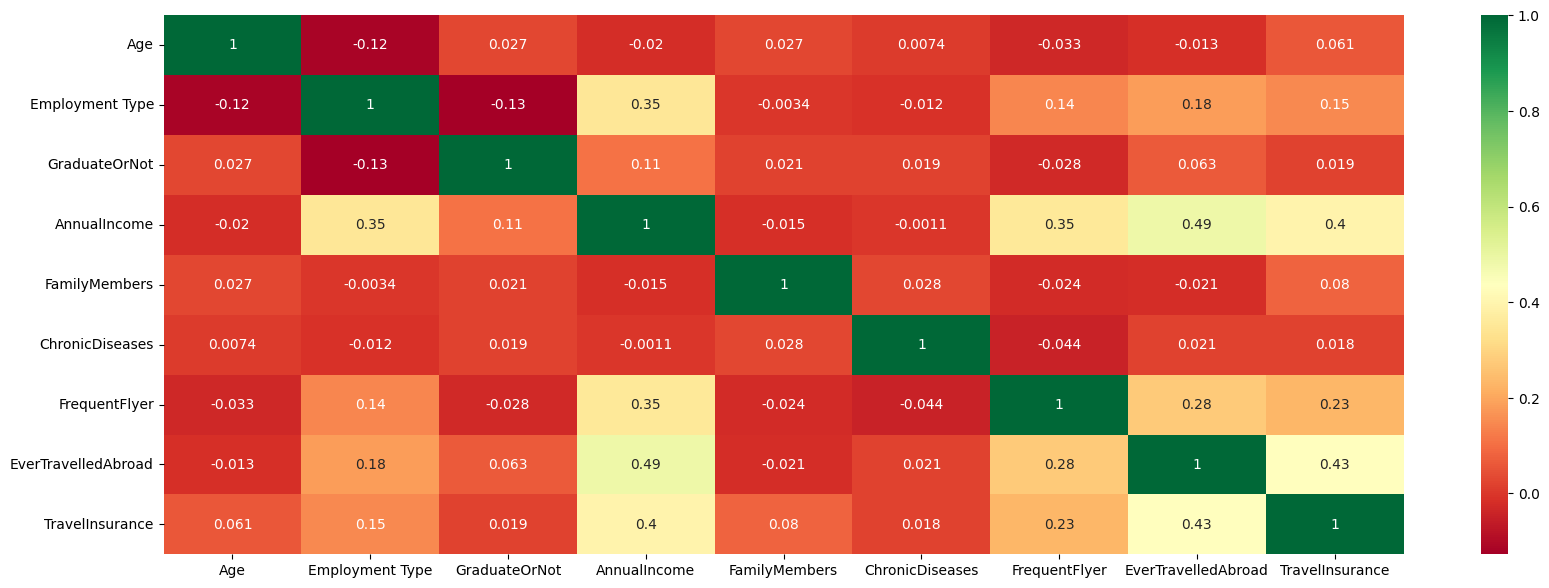

In [13]:
#Correlation Matrix with HeatMap (Pearson correlation coefficient)

# checking the correlation between all the features in the data

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['TravelInsurance'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)


#Creating heatmap of correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [14]:
#Identifying Predictor Significance
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["TravelInsurance"],
    data[
        [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TravelInsurance   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              266.5
Date:                Sat, 17 Feb 2024   Prob (F-statistic):                   1.42e-307
Time:                        21:56:53   Log-Likelihood:                         -1070.6
No. Observations:                1987   AIC:                                      2157.
Df Residuals:                    1979   BIC:                                      2202.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.1094      0.029      3.718      0.000       0.052       0.167
FamilyMembers           0.1780      0.037      4.758      0.000       0.105       0.251
ChronicDiseases         0.0118      0.021      0.573      0.567      -0.029       0.052
AnnualIncome            0.4248      0.046      9.310      0.000       0.335       0.514
Employment Type         0.0043      0.021      0.210      0.834      -0.036       0.045
GraduateOrNot          -0.0433      0.022     -1.978      0.048      -0.086      -0.000
FrequentFlyer           0.0823      0.025      3.326      0.001       0.034       0.131
EverTravelledAbroad     0.3752      0.027     13.782      0.000       0.322       0.429
==============================================================================
Omnibus:                      168.669   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.712
Skew:                           0.700   Prob(JB):                     3.48e-40
Kurtosis:                       2.514   Cond. No.                         7.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8) Which independent variables are significant?

Ans:

Variables are significant when p-value is less than 0.05. For this model except for "ChronicDiseases" and "Employment Type" all other variables have p-value less than 0.05. So, it can be said that all other variables are significant.

**VIF (Variance Inflation Factor)**

--> It is a measure used to assess multicollinearity in regression analysis. Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. This can cause issues in the model, such as unstable parameter estimates and difficulty in interpreting the coefficients.

--> The VIF quantifies how much the variance of a coefficient is inflated due to multicollinearity.

--> VIF is calculated to identify problematic predictor variables that may be causing multicollinearity issues in the model. High VIF values indicate that the corresponding predictor variable is highly correlated with other predictor variables, potentially leading to unstable estimates and unreliable inferences. In practice, variables with VIF values above a certain threshold (commonly 5 or 10) are considered to have multicollinearity issues and may need to be addressed, such as by removing them from the model or combining them with other variables.

In [15]:
# the independent variables set
X = data[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]
y = data["TravelInsurance"]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0                  Age  2.997823
1      Employment Type  3.489517
2        GraduateOrNot  4.695010
3         AnnualIncome  5.772798
4        FamilyMembers  3.341996
5      ChronicDiseases  1.365296
6        FrequentFlyer  1.479353
7  EverTravelledAbroad  1.631100


In [16]:
#calculating accuracy before regularization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = logistic_model.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7663316582914573


3) Is there any multicollinearity in the model?

Ans:

Yes , from the VIF data , beside AnnualIncome all other variables have moderate or less correlationship with each other as its VIF value is below 5 which is the threshold.

4) In the multivariate models are predictor variables independent of all the other predictor variables?

Ans:

No, all predictor variable are independent of each other beside AnnualIncome based on below VIF values. Low multicollinearity between predictor variables means that they are relatively independent of each other

These VIF values indicate the level of multicollinearity between each feature. In general:

--> Features with VIF values close to 1 (such as ChronicDiseases, FrequentFlyer, and EverTravelledAbroad) indicate low multicollinearity, suggesting that these features are relatively independent of each other.

--> Features with VIF values between 1 and 5 (such as GraduateOrNot, Age, Employment Type, and FamilyMembers) also indicate relatively low to moderate multicollinearity. While some correlation may be present, it is generally not considered problematic.

--> The feature "AnnualIncome" has a higher VIF value of 5.772798, indicating a stronger degree of multicollinearity compared to the other features which is regularized.


In [17]:
# Select the independent variables with high multicollinearity
X = data[['AnnualIncome']]

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Ridge regression with L2 regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, data['TravelInsurance'])

# Get the coefficients of the features
coefficients = ridge.coef_

# Replace the original variables with the reduced ones using the coefficients
data['AnnualIncome_Reduced'] = X_scaled.dot(coefficients)

# Drop the original highly correlated variables
data.drop(['AnnualIncome'], axis=1, inplace=True)



**Performing Regularization on AnnualIncome variable as it has VIF value above threshold that is 5:**

1) First standardize the independent variables to have a mean of 0 and a standard deviation of 1 to make them comparable. Then, we apply Ridge regression (Alpha = 1.0) with L2 regularization to the standardized data. Ridge regression penalizes large coefficients, which helps to reduce the impact of multicollinearity.

2) Finally, we replace the original highly correlated variables with the reduced ones using the coefficients obtained from Ridge regression. This helps to reduce multicollinearity while preserving the relationship between the features and the target variable.



In [18]:

# The independent variables set
X = data[['Age', 'Employment Type','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'AnnualIncome_Reduced','GraduateOrNot']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

data.head()


                feature       VIF
0                   Age  2.997751
1       Employment Type  2.939647
2         FamilyMembers  3.385116
3       ChronicDiseases  1.366474
4         FrequentFlyer  1.438888
5   EverTravelledAbroad  1.634430
6  AnnualIncome_Reduced  1.424112
7         GraduateOrNot  4.191916


,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Reduced
0,0.6,0,1,0.571429,1,0,0,0,-0.268725
1,0.6,1,1,0.714286,0,0,0,0,0.160014
2,0.9,1,1,0.285714,1,0,0,1,-0.218285
3,0.3,1,1,0.142857,1,0,0,0,-0.117405
4,0.3,1,1,0.857143,1,1,0,0,-0.117405


In [19]:
X1 = data[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome_Reduced','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]
y1 = data['TravelInsurance']

#Spliting data into Training 70%, Test set 30%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)



In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X is your feature matrix and y is your target variable

# Fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X1, y1)

# Retrieve coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X1.columns

# Create a dictionary mapping feature names to coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Rank features based on the absolute magnitude of coefficients
ranked_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print ranked features
for rank, (feature, coefficient) in enumerate(ranked_features, start=1):
    print(f"Rank {rank}: Feature '{feature}' with coefficient {coefficient}")


Rank 1: Feature 'AnnualIncome_Reduced' with coefficient 2.7893128046102578
Rank 2: Feature 'EverTravelledAbroad' with coefficient 1.718932760906705
Rank 3: Feature 'FamilyMembers' with coefficient 0.9999001648792999
Rank 4: Feature 'Age' with coefficient 0.6982395905255392
Rank 5: Feature 'FrequentFlyer' with coefficient 0.4787214542849524
Rank 6: Feature 'GraduateOrNot' with coefficient -0.1526167746015593
Rank 7: Feature 'Employment Type' with coefficient 0.12877466207368946
Rank 8: Feature 'ChronicDiseases' with coefficient 0.08762232627793767


5) In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?


--> AnnualIncome_Reduced: This variable has the highest coefficient magnitude, indicating that it is the most significant predictor in the model.

--> EverTravelledAbroad: The second-highest coefficient magnitude suggests that this variable is also highly significant.

--> FamilyMembers: This variable follows as the third most significant predictor.

--> Age: It ranks fourth in importance, though slightly lower than the top three.

--> FrequentFlyer: This variable is next in rank, indicating moderate significance.

--> GraduateOrNot: While it has a negative coefficient, it still has a relatively lower magnitude compared to the top predictors.

--> Employment Type: It ranks lower in significance compared to other predictors.

--> ChronicDiseases: This variable has the lowest coefficient magnitude among the predictors.

Based on above ranking "ChronicDiseases", "Employment Type", and "GraduateOrNot" candidates is excluded from the model.

In [21]:
#Removing insignificant predictor variables from the model

columns_to_drop = ['ChronicDiseases', 'Employment Type', 'GraduateOrNot']

# Drop the columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)


In [22]:
X = data[['Age', 'AnnualIncome_Reduced','FamilyMembers',  'FrequentFlyer', 'EverTravelledAbroad']]
y = data['TravelInsurance']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

data.head()

,Age,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Reduced
0,0.6,0.571429,0,0,0,-0.268725
1,0.6,0.714286,0,0,0,0.160014
2,0.9,0.285714,0,0,1,-0.218285
3,0.3,0.142857,0,0,0,-0.117405
4,0.3,0.857143,1,0,0,-0.117405


XGBoost (eXtreme Gradient Boosting) is an open-source library that provides an efficient and scalable implementation of gradient boosting algorithms. It is designed for speed and performance, making it one of the most popular and widely used machine learning libraries in both academia and industry.

Here are some key features and characteristics of XGBoost:

1) Gradient Boosting:

XGBoost is based on the gradient boosting framework, which is an ensemble learning technique that combines the predictions of several weak learners (typically decision trees) to create a strong learner.

2) Regularization:

XGBoost provides built-in regularization techniques to prevent overfitting, such as L1 and L2 regularization on leaf weights and tree complexity.

In [23]:
#Gradient Boosting used
# Instantiate the XGBoost classifier
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8040201005025126


The XGBoost classifier achieved an accuracy of approximately **0.8040** on the testing data.

Accuracy: The accuracy score represents the proportion of correctly classified instances out of the total instances in the test set. In this case, the XGBoost classifier correctly predicted around 80.23% of the instances.

Interpretation: The obtained accuracy indicates that the XGBoost classifier has reasonably good predictive performance on the given dataset. It suggests that the model is effective at generalizing from the training data to make accurate predictions on unseen data.

In [24]:
#Regularization L2
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model with L2 regularization
model_l2_reg = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of regularization strength (smaller values mean stronger regularization)
model_l2_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l2_reg = model_l2_reg.predict(X_test)

# Calculate accuracy with L2 regularization
accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)
print("Accuracy with L2 regularization:", accuracy_l2_reg)

Accuracy with L2 regularization: 0.7855946398659966


7) Does Regularization help?

Ans:

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that accuracy before regularization was **76.63%**, once when regularization was applied accuracy increased to **78.55%**. Hence it can be concluded that for this model regularization does help by nearly **2%**.

L2 regularization Testing to check Accuracy:

--> Also known as Ridge regularization, is a technique used to prevent overfitting in machine learning models, particularly in linear and logistic regression models. It works by adding a penalty term to the loss function, which penalizes large coefficients in the model.

--> In the context of linear regression, the L2 regularization term is calculated as the squared sum of the coefficients multiplied by a regularization parameter (λ or alpha), and it is added to the ordinary least squares (OLS) loss function.

--> L1 Regularization (Lasso): L1 regularization adds the sum of the absolute values of the coefficients to the loss function.

**Summary of Accuracy:**

--> A logistic regression model with L2 regularization achieved an accuracy of approximately 0.7855 on the test set.

1) Accuracy Score: The accuracy score of approximately 0.7855 indicates that the L2 regularized logistic regression model correctly predicted around 78.55% of the instances in the test set.

2) Interpretation: The obtained accuracy suggests that the L2 regularized logistic regression model has reasonably good predictive performance on the given dataset. It indicates that the model effectively generalizes from the training data to make accurate predictions on unseen data.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_true are the true labels and predictions are the predicted labels from your XGBoost model
# Replace y_true and predictions with the actual and predicted labels from your model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)


print("Accuracy:", accuracy)
print("Precision:", precision)



Accuracy: 0.8040201005025126
Precision: 0.8129032258064516


 1) Is the relationship significant?

 Ans:

 Yes, the realtionship is very much significant as the Accuracy score as per Gradient Boosting is 80.40% , L2 regularization is 78.55%, Precision is 81.29% and p value is below 0.05 beside Chronic Disease and Employment Type.

In [26]:
# Applying K-NN imputation method (adding 5% missing data)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from fancyimpute import KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate missing values in X_train for 5% missing data
np.random.seed(42)
missing_percentage = 0.05
missing_mask_train = np.random.rand(*X_train.shape) < missing_percentage
X_train_missing = X_train.copy()
X_train_missing[missing_mask_train] = np.nan

print(f"Missing Percentage: {missing_percentage * 100}%")

# Method 2: k-Nearest Neighbors Imputation
X_train_knn_imputed = KNN(k=5).fit_transform(X_train_missing)

# Applying the same missing mask to the test set
missing_mask_test = np.random.rand(*X_test.shape) < missing_percentage
X_test_missing = X_test.copy()
X_test_missing[missing_mask_test] = np.nan

# Impute missing values on the test set using KNN imputation
X_test_imputed = KNN(k=5).fit_transform(X_test_missing)

# Classification problem with RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_knn_imputed, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Output accuracy and confusion matrix
print("------------------------------------------------------------")
print("Accuracy with KNN imputation and 5% missing data:", accuracy)
print("------------------------------------------------------------")
print("Confusion Matrix with KNN imputation and 5% missing data:")
print(cm)



Missing Percentage: 5.0%
Imputing row 1/1589 with 0 missing, elapsed time: 0.955
Imputing row 101/1589 with 0 missing, elapsed time: 0.958
Imputing row 201/1589 with 0 missing, elapsed time: 0.960
Imputing row 301/1589 with 1 missing, elapsed time: 0.962
Imputing row 401/1589 with 0 missing, elapsed time: 0.963
Imputing row 501/1589 with 0 missing, elapsed time: 0.965
Imputing row 601/1589 with 0 missing, elapsed time: 0.967
Imputing row 701/1589 with 1 missing, elapsed time: 0.968
Imputing row 801/1589 with 0 missing, elapsed time: 0.970
Imputing row 901/1589 with 1 missing, elapsed time: 0.971
Imputing row 1001/1589 with 0 missing, elapsed time: 0.973
Imputing row 1101/1589 with 0 missing, elapsed time: 0.975
Imputing row 1201/1589 with 0 missing, elapsed time: 0.976
Imputing row 1301/1589 with 1 missing, elapsed time: 0.978
Imputing row 1401/1589 with 1 missing, elapsed time: 0.980
Imputing row 1501/1589 with 0 missing, elapsed time: 0.981
Imputing row 1/398 with 0 missing, elapsed 

# Confusion Matrix and Accuracy Summary

**True Positives (TP) and True Negatives (TN):**

TP: 88 (Correctly predicted positive instances)
TN: 229 (Correctly predicted negative instances)

**False Positives (FP) and False Negatives (FN):**

FP: 28 (Incorrectly predicted positive instances)
FN: 53 (Incorrectly predicted negative instances)

**Model Performance:**

--> The model seems to perform relatively better at predicting negative instances (TN) compared to positive instances (TP). There are a considerable number of false negatives (53), indicating instances where the model failed to predict positive cases when it should have.

--> An accuracy of 0.7964 means that the model correctly predicted around 79.64% of the instances in the test set.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)

# Calculate log loss
logloss = log_loss(y_test, y_pred_prob)
print("Log Loss:", logloss)




Log Loss: 0.544423574751654


# Log Loss:

1) Log loss, also known as cross-entropy loss, is a commonly used metric to evaluate the performance of probabilistic classification models. It measures the divergence between predicted probabilities and actual class labels. Lower log loss values indicate better model performance, with 0 representing perfect predictions.

2) Interpretation: The log loss value of approximately 0.543 indicates that, on average, the model's predicted probabilities are relatively close to the actual outcomes. The model's predicted probabilities have relatively low uncertainty, contributing to the lower log loss.

In [28]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to predicted classes
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[236  21]
 [ 73  68]]


2) Are any model assumptions violated?

Ans:

  No, the dependent variable is 0/1, so the question is a classification question which make sense to all models in AutoML.

#Train AutoML Models

Let's configure the AutoML training parameters.

max_models: Maximum number of models to train
balance_classes: set to True to balance the class labels for tasks with imbalance data
seed : Set for reproducibility


In [29]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


6) Does the model make sense?

Ans:

Based on the above code and analysis, we can assess that the model makes sense:

1) Feature Importance: The logistic regression model with L2 regularization has been trained and the coefficients of the predictor variables have been retrieved and ranked based on their magnitude. This provides insight into which variables have the most significant impact on the classification outcome.

2) Coefficient Analysis: The ranked features show that "AnnualIncome_Reduced", "EverTravelledAbroad", and "FamilyMembers" have the highest coefficients, indicating that they are the most influential predictors in the model. These variables align with common sense expectations as factors that could affect the likelihood of travel insurance purchase.

3) Model Performance: As per above model's performance metrics such as accuracy, precision etc is above 75% which makes sense.

4) The model have p value, VIF between their respective ranges considering the minimum and maximum values of the target variable.


In [30]:
data.head()



Age,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Reduced
0.6,0.571429,0,0,0,-0.268725
0.6,0.714286,0,0,0,0.160014
0.9,0.285714,0,0,1,-0.218285
0.3,0.142857,0,0,0,-0.117405
0.3,0.857143,1,0,0,-0.117405
0,0.285714,0,0,0,0.109574
0.6,0.285714,0,0,0,0.185234
0.6,0.142857,1,1,1,0.210454
0.3,0.571429,1,1,1,0.260894
0.8,0.142857,1,0,0,-0.0669655


In [31]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [32]:

# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()


In [33]:
drift_data["is_train"].table()


is_train,Count
0,496
1,1491


#Start to train in 10 models by AutoML

In [34]:
x = list(set(train.col_names) - set(["TravelInsurance"]))

In [35]:
from h2o.automl import H2OAutoML
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)

aml = H2OAutoML(max_models=10, max_runtime_secs=3600, seed=1234, sort_metric="mae", project_name="random_split")
#aml = H2OAutoML(max_models=10, seed=1234, sort_metric="F1")
aml.train(x=x, y="TravelInsurance", training_frame=train)

AutoML progress: |
21:57:04.819: _train param, Dropping bad and constant columns: [is_train]
21:57:04.819: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:57:12.352: _train param, Dropping bad and constant columns: [is_train]
21:57:12.352: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:57:13.954: _train param, Dropping bad and constant columns: [is_train]
21:57:13.954: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
21:57:20.412: _train param, Dropping bad and constant

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240217_215704


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.10617282321732419
RMSE: 0.32584171497419445
MAE: 0.22878253166994802
RMSLE: 0.22780952079113287
Mean Residual Deviance: 0.10617282321732419

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.14618285209392473
RMSE: 0.3823386615213334
MAE: 0.2721427759512607
RMSLE: 0.27028948198990504
Mean Residual Deviance: 0.14618285209392473

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.272147  0.0135768  0.266054      0.254542      0.279326      0.290463      0.270349
mean_residual_deviance  0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
mse                     0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
r2                      0.356036  0.0708929  0.408607      0.436221      0.317178      0.25913       0.359046
residual_deviance       0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
rmse                    0.381944  0.0197057  0.364586      0.362338      0.396411      0.407426      0.378958
rmsle                   0.270016  0.0137636  0.25981       0.254961      0.277645      0.289159      0.268504

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-17 21:57:39  2.047 sec   0                  0.5              0.5             0.25
    2024-02-17 21:57:39  2.160 sec   5                  0.362502         0.30633         0.131408
    2024-02-17 21:57:39  2.213 sec   10                 0.346039         0.257918        0.119743
    2024-02-17 21:57:39  2.258 sec   15                 0.34026          0.247741        0.115777
    2024-02-17 21:57:39  2.299 sec   20                 0.336007         0.24382         0.112901
    2024-02-17 21:57:39  2.339 sec   25                 0.330642         0.236536        0.109324
    2024-02-17 21:57:40  2.382 sec   30                 0.325842         0.228783        0.106173

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
AnnualIncome_Reduced  158.373                1                    0.494863
FamilyMembers         57.1155                0.360639             0.178467
Age                   55.2212                0.348679             0.172548
EverTravelledAbroad   39.1827                0.247408             0.122433
FrequentFlyer         10.1413                0.0640346            0.0316884

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [36]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_3_AutoML_1_20240217_215704,0.272143,0.382339,0.146183,0.270289,0.146183
XGBoost_1_AutoML_1_20240217_215704,0.275259,0.392436,0.154006,0.27876,0.154006
StackedEnsemble_AllModels_1_AutoML_1_20240217_215704,0.278022,0.372567,0.138806,0.262084,0.138806
StackedEnsemble_BestOfFamily_1_AutoML_1_20240217_215704,0.278219,0.372665,0.138879,0.262064,0.138879
DRF_1_AutoML_1_20240217_215704,0.278947,0.375377,0.140908,0.264841,0.140908
GBM_3_AutoML_1_20240217_215704,0.279719,0.377217,0.142292,0.26627,0.142292
GBM_4_AutoML_1_20240217_215704,0.282799,0.37746,0.142476,0.266672,0.142476
XGBoost_2_AutoML_1_20240217_215704,0.283072,0.397823,0.158263,0.284429,0.158263
GBM_2_AutoML_1_20240217_215704,0.284197,0.376168,0.141502,0.265233,0.141502
GBM_1_AutoML_1_20240217_215704,0.29588,0.380404,0.144707,0.267777,0.144707


In [37]:
best_model = aml.leader
best_model.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.14750125650066234
RMSE: 0.38405892321447543
MAE: 0.2672871406811605
RMSLE: 0.2672100237218752
Mean Residual Deviance: 0.14750125650066234

The model reported above is a Distributed Random Forest (DRF) model, and the performance metrics on the test data are as follows:

1) MSE (Mean Squared Error): 0.147

2) RMSE (Root Mean Squared Error): 0.384

3)MAE (Mean Absolute Error): 0.267

4) RMSLE (Root Mean Squared Logarithmic Error): 0.267

5) Mean Residual Deviance: 0.147

--> The DRF model seems to have performed well, with relatively low values for MSE, RMSE, MAE, RMSLE, and Mean Residual Deviance as compared to other models.






In [38]:
from sklearn.metrics import accuracy_score

# Assuming y_true are true labels and y_pred are predicted labels
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7638190954773869


#The importance of every variables

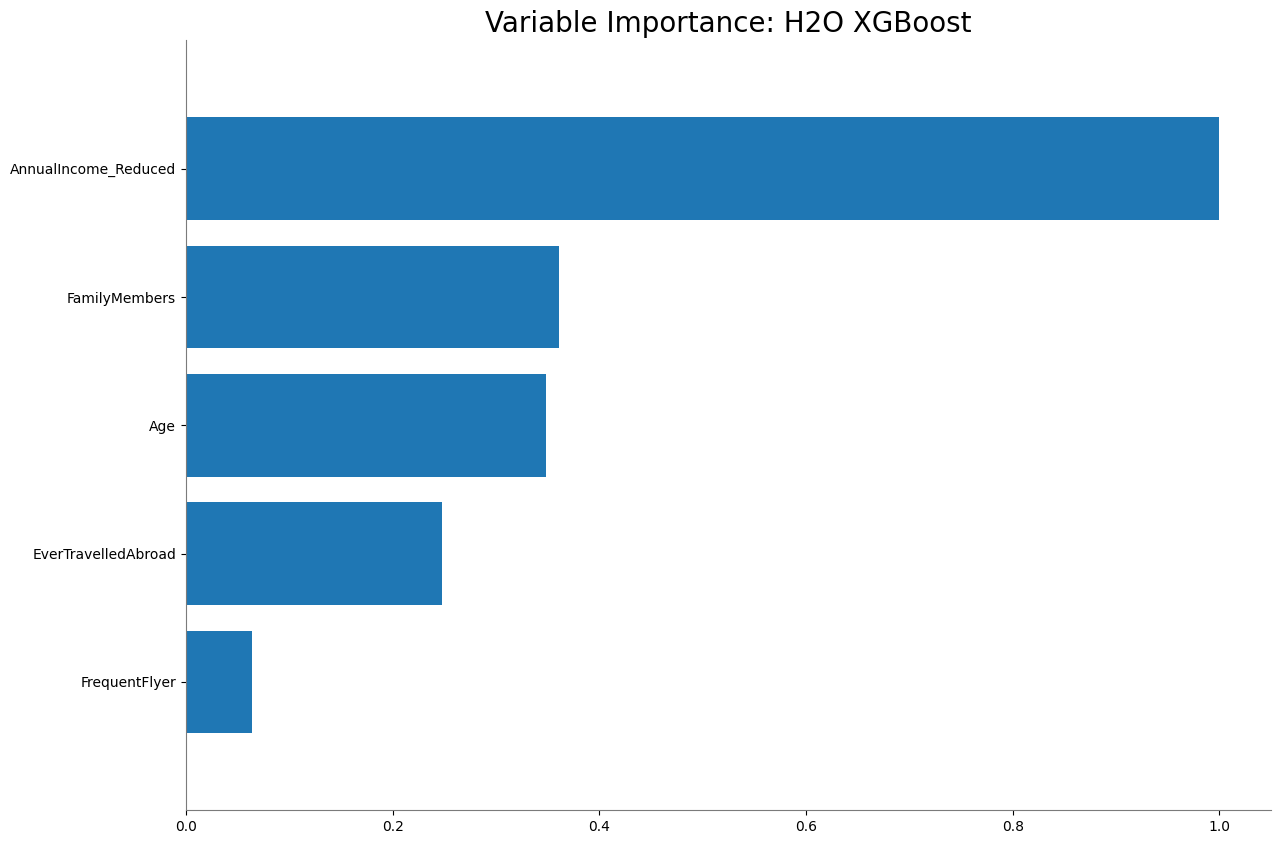

<Figure size 640x480 with 0 Axes>

In [39]:
%matplotlib inline
best_model.varimp_plot()

 9) Which hyperparameters are important?

Ans:

 Summary of the important hyperparameters used above are:

1) XGBoost Classifier:

--> max_depth: Controls the maximum depth of the individual trees. It's not explicitly set in the code, so it will default to a value.

--> learning_rate: Learning rate or step size shrinkage used in updates. Again, not explicitly set, so it uses the default value.

--> n_estimators: Number of boosting rounds. Not explicitly set, so it uses the default.

--> reg_lambda: L2 regularization parameter. Not explicitly set, so it uses the default.

--> max_depth, learning_rate, n_estimators, and reg_lambda are not explicitly set its default values for these parameters when creating and training the classifier. The defaults vary depending on the version of XGBoost being used. For example, max_depth defaults to 6, learning_rate to 0.3, n_estimators to 100, and reg_lambda to 1.0.

2) Logistic Regression with L2 Regularization:

--> C: Inverse of regularization strength. In this case, set to 1.0, meaning relatively weak regularization.

3) H2O AutoML:

--> max_models: Maximum number of models to be trained. Set to 10.

--> max_runtime_secs: Maximum runtime for the AutoML process. Set to 3600 seconds (1 hour).

--> sort_metric: Metric used to sort the models in the leaderboard. Set to "mae" (Mean Absolute Error).


10) Coding professionalism?

--> Yes

**References**:

1)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

2)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb

3) ChatGPT


MIT License

Copyright (c) 2024 Anzal Shaikh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.